In [1]:
from src.loader import ImageLoader

In [2]:
from pathlib import Path

data_folder = Path("./images")

loader = ImageLoader(data_folder)        

Grape_Esca


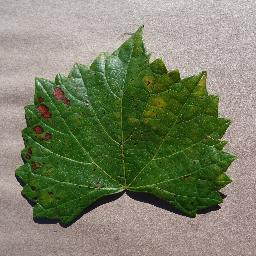

In [8]:
from PIL import Image
from torchvision.transforms import ToPILImage

topil = ToPILImage()

im, class_name = loader[0]
print(class_name)
topil(im)

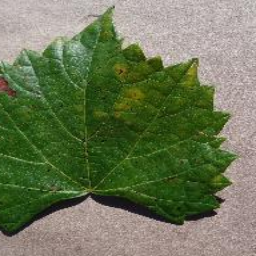

In [27]:
from torchvision.transforms import RandomResizedCrop

rc = RandomResizedCrop(size=im.shape[1:], scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
topil(rc(im))

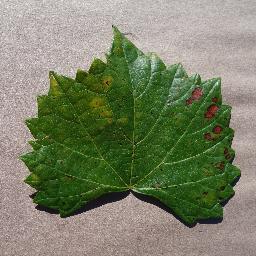

In [17]:
from torchvision.transforms import RandomHorizontalFlip

flip = RandomHorizontalFlip(p=1.0)
topil(flip(im))

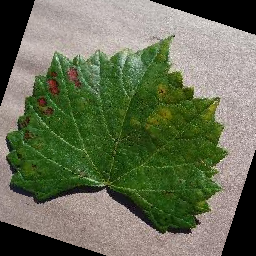

In [18]:
from torchvision.transforms import RandomRotation

rot = RandomRotation(degrees=[0, 360])
topil(rot(im))

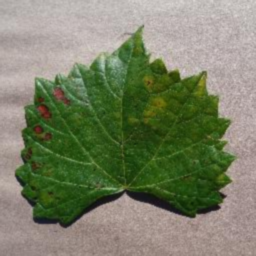

In [62]:
from torchvision.transforms import GaussianBlur

gauss = GaussianBlur(kernel_size=5, sigma=(0.1, 3.0))
topil(gauss(im))

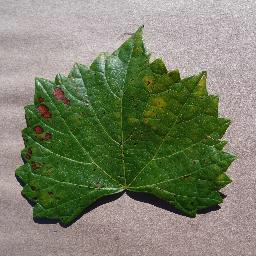

In [78]:
from torchvision.transforms import RandomAutocontrast

contraster = RandomAutocontrast(p=1.0)
topil(contraster(im))

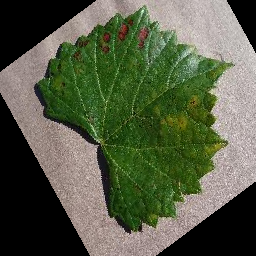

In [133]:
from torchvision.transforms import RandomAffine

shear = RandomAffine(degrees=[0,360], translate=(0.1, 0.3), scale=(0.9, 1.1), shear=(-30, 30))
topil(shear(im))